In [1]:
import numpy as np  
import numpy.random as random  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

# Computational Investigation into the Tacoma Narrows Bridge Collapse of 1940.

##### Author: Aubrey Clark

Contained within this report is an investigation into a cornerstone of modern science. Using computational methods including forward integration techniques, the Tacoma Narrow's Bridge collapse of 1940 will be explained from a torsional viewpoint. By doing this, we will explore the effect of wind, resonance and chaos theory.

## Introduction

A disaster in 1940, causing the collapse of a newly opened bridge still remains not 100% understood. The dynamics behind the collapse would be, if not impossible to solve using pen and paper, and thus a computational approach is required.

Following a systematic approach, Cromer and Taylor integrators will be used to reconstruct the bridge's behavior during the collapse. Doing this will allow one to consider the bridge with no wind and with wind, and then discover less trivial relations between torsion angle, the bridges natural frequency and chaos theory.


The investigation was found to be a success, finding compelling results that modelled the Tacoma bridge as 2 coupled 2nd order ODE's that also had the capacity for both resonance and chaotic behaviour. Taking this further, modern solutions were put forward to combat bridge instability and torsional stress, which catagorically showed success in previously problematic regions.

In [2]:
import sys
import matplotlib 
print("Python version: {}".format(sys.version))
print("Matplotlib version: {}".format(matplotlib.__version__))

Python version: 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]
Matplotlib version: 3.7.0


## The Tacoma Narrows Bridge

In this problem, the aim is to consider computational methods to accurately model the collapse of the well known Tacoma Narrows Bridge. The well known collapse occured on the 7th November 1940, and was spectacularly caught on film. Well known to users as being an oddity. The thin bridge was thought to be unstable throughout construction when workers reported 'during the final stages of work,an unusual rhythmic vertical motion began to grip the main span in only moderate winds' [1]. 

Using the forces assumed to be acting on the bridge at the time of collapse, the purpose of the results below is to find how the bridge collapsed. The nature of the problem will be explored further and will be compared to similar cases, as-well as offering solutions to combat problematic behaviour.

To build a model of the forces on the bridge, a system of classical coupled ODE's were assumed. In this first case only a section of the bridge was considered and it was assumed the bridge cables exhibit spring like properties. Doing this, simplified the force dynamics at play here, but it is still important to note that cables do not act like springs when compressed, therefore a modified Hooke's law was used that only output force in one direction - when stretched. Well known as McKenna-Tuama's Model. [2]

## I. Solving Equations Using Forward Integrators.

The investigation aims to explore the effectiveness of two forward calculating integrating methods. One of these methods is the Cromer method, which updates the variables at the next time step based on the time-dependent variable's value at the current time step. The other, when Cromer is false, is the Taylor method which updates variables at the next step using the current values.
Doing this, helped validate simulations and ensure their consistency. This use of both Cromer and Taylor methods  permits us both stability and flexibility in our computations.

In [3]:
#Parameter definitions 
tstart=0
tend=100         #Simulation start and end points

d=0.01           #d = Friction coefficient
a=1              #M = Mass of the beam in consideration  
M=2500           #L = Length of beam whose exact value is not particularly important in our analysis 
K=10000          #K = Spring constant  
l=6              #L = Length of beam, not particularly important in our analysis 


The implementation of both forward integrators was done by making new variables defined as;

$$\frac{dy}{dt} = z $$ 

$$\frac{d\theta}{dt} = gamma $$

This is a standard method of turning a 2nd order ODE to a first order one, and is the reason we can use both the Cromer and Taylor method when generally they are both 1st order integrator approximations. Particularly useful in this case as it allows the integration of 2nd order ODE's.

In [4]:
def tacoma(dt=0.01, cromer=False, d = 0.01, a = 1, M = 2500, K =10000, l = 6, theta0 = 0, y0 = 0):

    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Set the initial conditions

    y[0] = y0 ; theta[0] = theta0 ; z[0] = 0 ; gamma[0] = 0
  


    # Loop over all of the times and integrate the model
    for n in range(Nt-1):

        z[n+1] = z[n] + dt*(-(d*z[n])-(K/(M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) + np.exp(a*(y[n]+l*np.sin(theta[n]))) - 2))

        gamma[n+1] = gamma[n] + dt*(-(d*gamma[n])+((3*np.cos(theta[n])*K)/(l*M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) - np.exp(a*(y[n]+l*np.sin(theta[n])))))
        

        # Time-step the angle/vertical displacement. If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1] = y[n] + dt*z[n+1]
            theta[n+1] = theta[n] + dt*gamma[n+1]
         
        
        else:

            y[n+1] = y[n] + (dt*z[n])
            theta[n+1] = theta[n] + (dt*gamma[n])
  

    return times, theta, y

With the construction of a general model that predicts the displacement of the Tacoma Bridge, tests could now be conducted to assess its convergence. Note the simulated time is higher here than anywhere else, this is to show the long term decay of inital conditions.

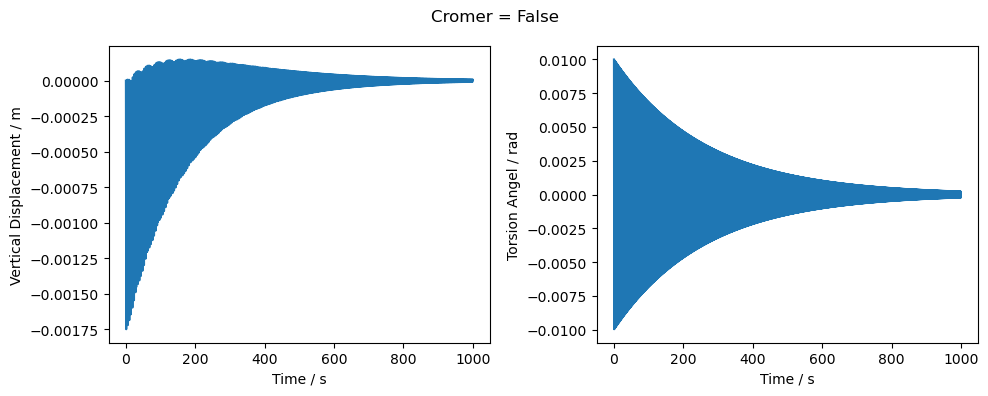

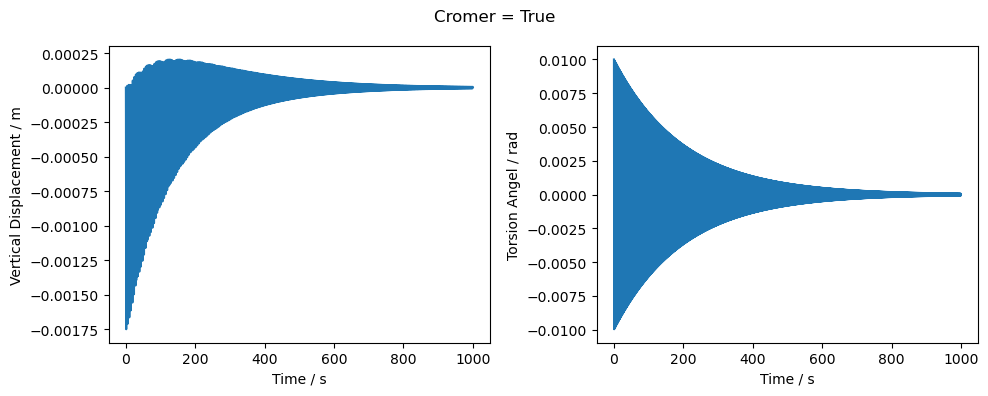

In [5]:
%matplotlib inline
#initial simulated time - longer simulation time will cause plot to load for a bit 
tend=1000

#loading data for the cases when cromer is True and False
times, theta, y = tacoma(cromer=False, theta0=0.01, dt=0.0001)
times_cromer, theta_cromer, y_cromer = tacoma(cromer=True, theta0=0.01, dt=0.001)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Plotting the first row 
axes[0].plot(times, y)
axes[0].set_xlabel('Time / s')
axes[0].set_ylabel('Vertical Displacement / m')

axes[1].plot(times, theta)
axes[1].set_xlabel('Time / s')
axes[1].set_ylabel('Torsion Angel / rad')

fig.suptitle('Cromer = False')
plt.tight_layout()

# Plotting the second row,
fig1, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(times_cromer, y_cromer)
axes[0].set_xlabel('Time / s')
axes[0].set_ylabel('Vertical Displacement / m')

axes[1].plot(times_cromer, theta_cromer)
axes[1].set_xlabel('Time / s')
axes[1].set_ylabel('Torsion Angel / rad')

fig1.suptitle('Cromer = True')
plt.tight_layout()


plt.show()

As expected, both the Cromer method and Taylor method predict similar behaviour for both displacements. Both forward integrators predict that for the same inital conditions, vertical displacement and torsion angle will decay to 0 over time.

Not suprisingly, the size of our timesteps (dt) play an important role in the accuracy of model. In fact, when dt is larger than 0.0001 for Taylor, the results of both models diverge. This aberration derives from effectiveness of both integrators. We can infer from this that the global error for Cromer, in this application, is superior to that of Taylor's. Because of this, we will assume the Cromer henceforth, as-well as it having a slight computational edge.

## II. Introducing Wind.

Now, like the original Tacoma Bridge, wind will be introduced. Computationally this is simply, but leads to increasingly complex behaviour.

This can be done by adding the acceleration produced by a driving wind force to the vertical oscillations of the bridge. Because it is an vertical acceleration being added, refering to the inital definition of z, the expression for wind is then added inside the dt multiplier term for the z integrator;

$$ a(t) = A\sin(\omega t)$$


In [7]:
#modified tacoma solver, wind force is vertical so additional wind term added to the z[n+1] term.

tstart=0  #reduced simulation time to increase computational speed
tend=100
def tacoma_withwind(dt=0.01, cromer=True, d = 0.01, a = 1, M = 2500, K =10000, l = 6, theta0 = 0, y0 = 0, A = 1, w = 3):
    
    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Setting initial conditions

    y[0] = y0 ; theta[0] = theta0 ; z[0] = 0 ; gamma[0] = 0
  

    # Loop over all of the times and integrate the model
    for n in range(Nt-1):

        z[n+1] = z[n] + dt*(-(d*z[n])-(K/(M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) + np.exp(a*(y[n]+l*np.sin(theta[n]))) - 2) + (A*np.sin(w*times[n])))
        gamma[n+1] = gamma[n] + dt*(-(d*gamma[n])+((3*np.cos(theta[n])*K)/(l*M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) - np.exp(a*(y[n]+l*np.sin(theta[n])))))
        

        # Time-step the angle/vertical displacement. If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1] = y[n] + dt*z[n+1]
            theta[n+1] = theta[n] + dt*gamma[n+1]
        else:
            y[n+1] = y[n] + (dt*z[n])
            theta[n+1] = theta[n] + (dt*gamma[n])
  
    return times, theta, y

## III. Uncovering Resonance and Dramatic Changes.

To fully appreciate how this slight change causes dramatically different results, below is a direct comparision of our model with and without wind. 

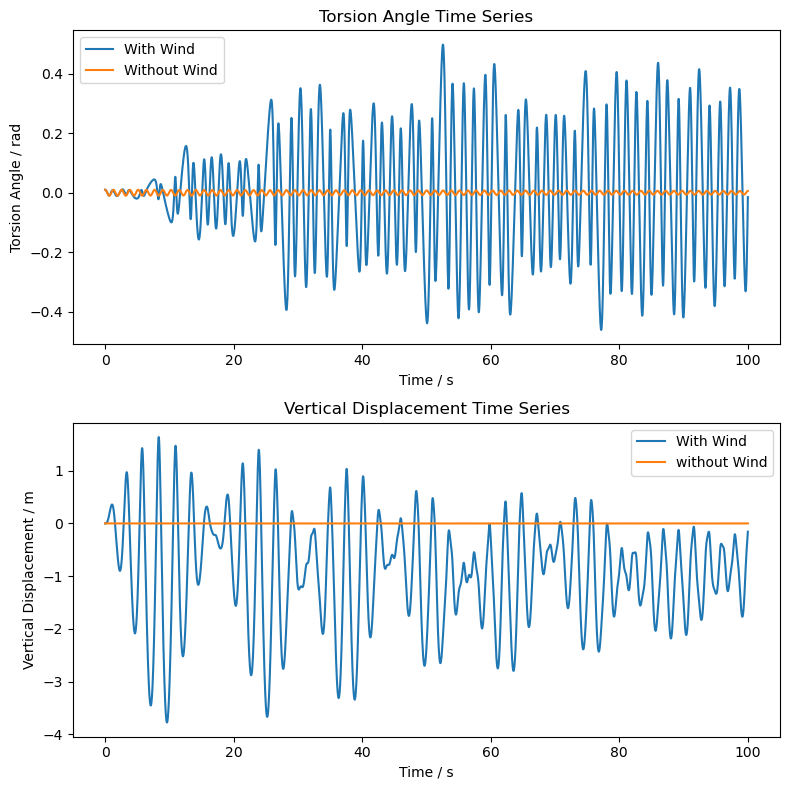

In [8]:
#loading data
tend = 100
times_wind, theta_wind, y_wind = tacoma_withwind(theta0=0.01, dt=0.01, A=2, w=2.8)
times_nowind, theta_nowind, y_nowind = tacoma_withwind(theta0=0.01, dt=0.01, A=0, w=2.8)

fig, axes = plt.subplots(2, 1, figsize=(8, 8)) #initialising subplots

#populating first subplot - torsion angle
axes[0].plot(times_wind, theta_wind, label='With Wind')
axes[0].plot(times_nowind, theta_nowind, label='Without Wind')
axes[0].set_xlabel('Time / s')
axes[0].set_ylabel('Torsion Angle / rad')
axes[0].set_title('Torsion Angle Time Series')
axes[0].legend()

# second plot - vertical displacement
axes[1].plot(times_wind, y_wind, label='With Wind')
axes[1].plot(times_nowind, y_nowind, label='without Wind')
axes[1].set_xlabel('Time / s')
axes[1].set_ylabel('Vertical Displacement / m')
axes[1].set_title('Vertical Displacement Time Series')
axes[1].legend()

#making subplots neater
plt.tight_layout()

plt.show()

The graphs clearly show that wind introduction significantly affects both the torsion angle and vertical displacement. Drawing attention to the torsion angle time series, with no wind the angle decays and with wind the angle dramatically grows. Indeed from comparison of the two graphs it can be inferred that it was the torsion angle that collapsed the bridge and not vertical displacements. This is because the vertical abberations are clearly much more controlled than the those of the torsion angle. It is this unstable behaviour of the torsion angle that toppled Tacoma.

Now we know that the torsion angle is problematic, we will briefly consider only the torsion angle in greater depth. To dig deeper into the dynamics of this, the following plots aim to identify whether it was the wind strength, or frequency that led to this uncontrolled torsion angle behaviour.

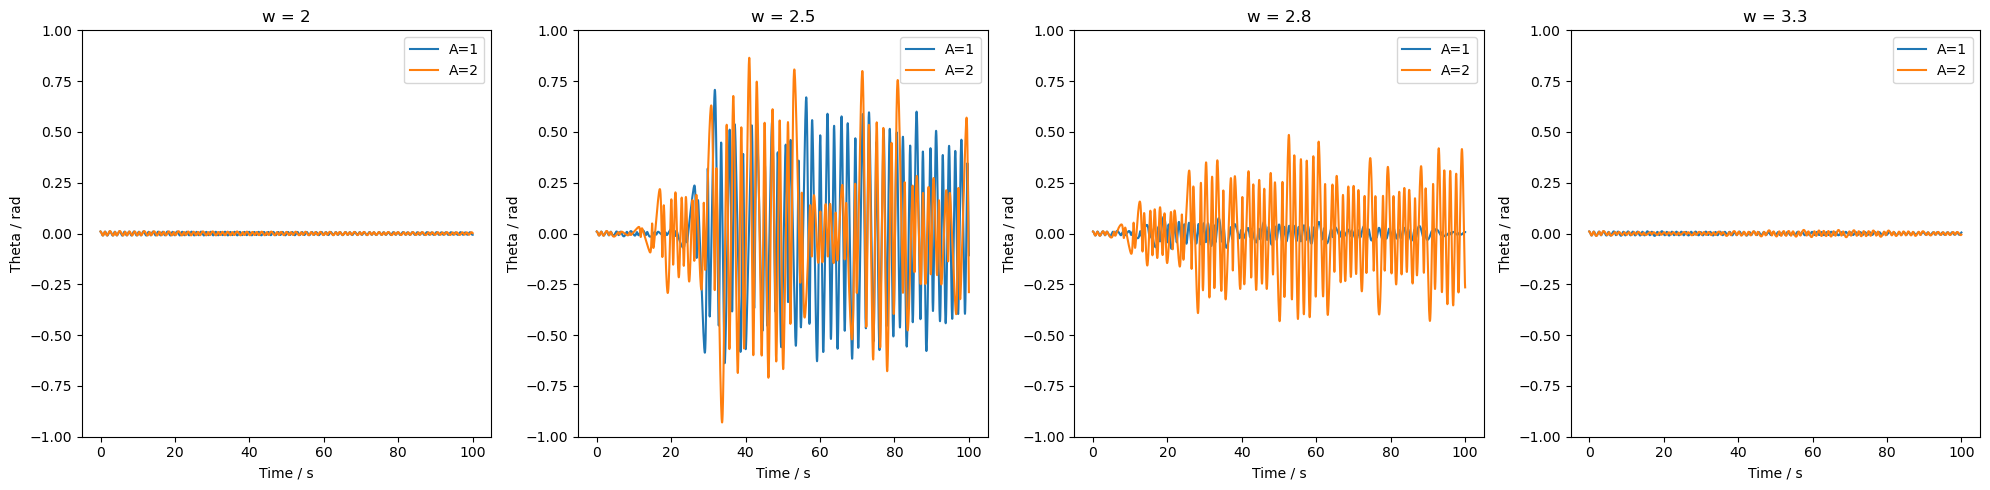

In [9]:
tend = 100
# Values of w to vary
w_values = [2, 2.5, 2.8, 3.3]

# Create subplots with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Loop over the values of w
for i, w in enumerate(w_values):
    # Calculate theta for A=1 and current value of w
    times1, theta1, _ = tacoma_withwind(A=1, w=w, theta0=0.01, dt=0.001)

    # Calculate theta for A=2 and current value of w
    times2, theta2, _ = tacoma_withwind(A=2, w=w, theta0=0.01, dt=0.001)

    # Plot theta in the current subplot
    ax = axs[i]
    ax.plot(times1, theta1, label='A=1')
    ax.plot(times2, theta2, label='A=2')
    ax.set_xlabel('Time / s')
    ax.set_ylabel('Theta / rad')
    ax.set_title(f'w = {w}')
    ax.set_ylim([-1, 1])
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Clearly in the graphs above, the bridge's torsion angle oscillation when wind is incident, is very much influenced by the wind frequency w. The bridge responds most when w ~ 2.5 rad, and results in an increase in torsion angle of up to 85x the initial condition. This behaviour is undoubtedly unstable and can only be attributed to resonant behaviour. Making a minor impact to the bridge's rotation is the strength of the wind itself, and whilst of course as the amplitude of the wind strength tends to infinity it will play more of a role in torsion angle oscillation amplitudes. For this investigation, only realistic winds are considered and given that restrictive domain, wind frequency has a much larger impact.

The dramatic increase in torsion angle co-incides with eye witness statements [3] at the time of collapse. In the case of resonance, we can draw parallels with the harmonic motion of a pendulum. In this case, the wind frequency that maximizes the unstable behavior would likely align with the natural frequency of the bridge. This frequency would need to be calculated based off our current model's mono-directional Hooke's law and also the bridge mass and length dependency. By observing the range of wind frequencies that cause the unstable behaviour, a good estimate for the bridge's natural frequency is ~ 2.5 rad/s.

## IV. Concequences of Dynamic Coupled Systems and Chaos Theory.

In addition to this, interesting behaviour arose when we considered both the vertical displacement and torsion angle together.

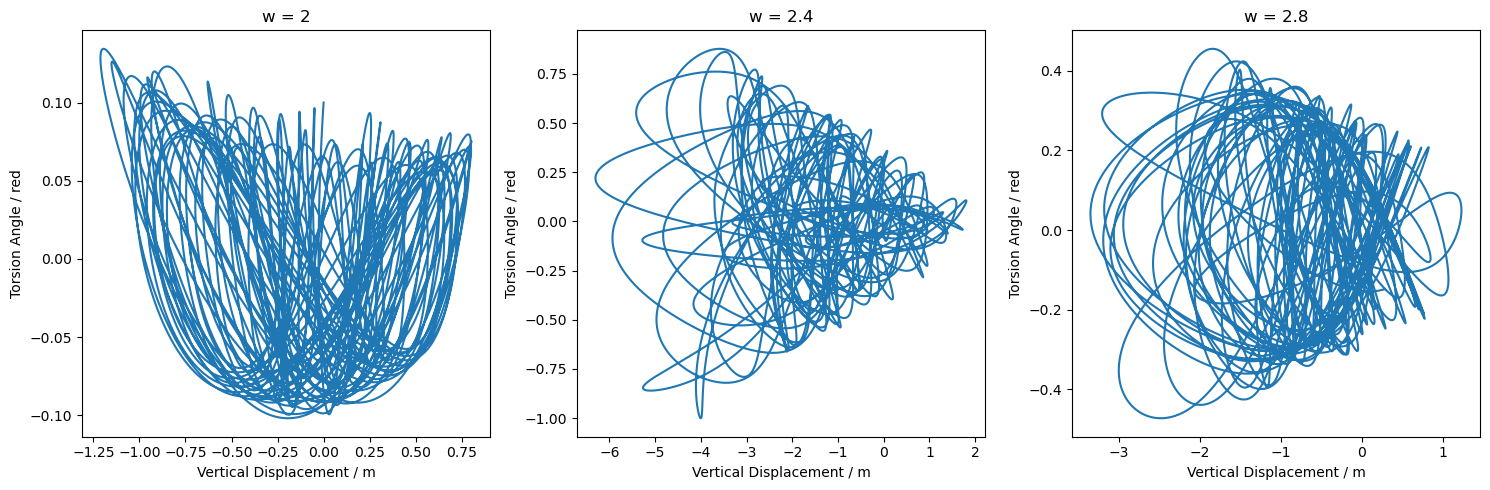

In [10]:
#Chosen parameters 
A = 2 ; tend = 100
theta0 = 0.1
dt = 0.001
w_values = [2, 2.4, 2.8]

# 3 Figure subplot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# iterating the tacoma with wind function to populate each plot
for i, w in enumerate(w_values):
    times_p4, theta_p4, y_p4 = tacoma_withwind(cromer=True, A=A, w=w, theta0=theta0, dt=dt)
    axs[i].plot(y_p4, theta_p4)
    axs[i].set_xlabel('Vertical Displacement / m')
    axs[i].set_ylabel('Torsion Angle / red')
    axs[i].set_title('w = {}'.format(w))


    
    
plt.tight_layout()
plt.show()

Evidently, the insight to be gained from plotting the torsion angle against the vertcial displacement of the bridge is complicated. Firstly, stark stark differences between each graph when the only change is the driving wind frequency. Each graph above is quite unpredictable and share little other characteristics.
These statements fufil many of the axioms that define chaotic behaviour and only re-enforces the hyper-sensitive results we found earlier.

 - Extreme sensitivity to initial conditions
 - Density of orbits
 
Interestingly, the scale of each plot is slightly different, but once again for w ~ 2.5, the sillohuette of the choatic plot grows. From this, we can explain the excessive torsion angle abberations that vary largely despite minor environment changes, and ultimately the collapse of the Tacoma Narrow's bridge. Perhaps it is the onset of resonance that causes a cascading effect of increasingly chaotic behaviour in the system, or vice versa. This behaviour would need to be studied further, to do this, research into attractors and basic harmonic motion, for example the double pendulum could be of use.

Now we have replicated the conditions and the results of the Tacoma Bridge collapse, we will now take a brief look at how, and with what efficiency countermeasures could have prevented the disaster.

## V. Avoiding Resonance.

Given the inadequate damping measures onbaord the Tacoma Bridge, we will explore the effect of a  electromagnetic damper. Like a flag snapping in the wind, we will be utilising a damper to minimise the effect of hysteresis that culminated in sudden catastrophic increase in torsion angle. By Faraday's law [4], an emf can be induced when a conductor is placed in a changing magnetic field. When this occurs, eddy currents are produced in the conducting path, which themselves generate a strong magnetic field that opposes the change that made them. This results in a dynamic force that increases with the speed of magnetic field change. Hence we can relate it to the angular velocity of certain bridge sections.

In [11]:
#new parameters: p = electromagnetic co-efficient

def tacoma_withwind_damped(dt=0.01, cromer=True, d = 0.01, a = 1, M = 2500, K =10000, l = 6, theta0 = 0, y0 = 0, A = 1, w = 3, p = 3):
    
    # Create the variables to store the results
    times=np.arange(tstart, tend+dt, dt)  # Create the array of model times
    Nt=len(times)                         # Number of time-steps
    y=np.zeros(Nt)                   
    theta=np.zeros(Nt)                   
    z=np.zeros(Nt) 
    gamma=np.zeros(Nt) 

    # Setting initial conditions

    y[0] = y0 ; theta[0] = theta0 ; z[0] = 0 ; gamma[0] = 0
  

    # Loop over all of the times and integrate the model
    for n in range(Nt-1):

        z[n+1] = z[n] + dt*(-(d*z[n])-(K/(M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) + np.exp(a*(y[n]+l*np.sin(theta[n]))) - 2) + (A*np.sin(w*times[n])))
        gamma[n+1] = gamma[n] + dt*(-(d*gamma[n])+((3*np.cos(theta[n])*K)/(l*M*a))*(np.exp(a*(y[n]-l*np.sin(theta[n]))) - np.exp(a*(y[n]+l*np.sin(theta[n]))))) \
        - (dt*gamma[n]*p) #additional dt term corresponding to damping force
        

        # Time-step the angle/vertical displacement. If we are using 'Taylor' or 'Cromer"
        if cromer:
            y[n+1] = y[n] + dt*z[n+1]
            theta[n+1] = theta[n] + dt*gamma[n+1]
        else:
            y[n+1] = y[n] + (dt*z[n])
            theta[n+1] = theta[n] + (dt*gamma[n])
  
    return times, theta, y

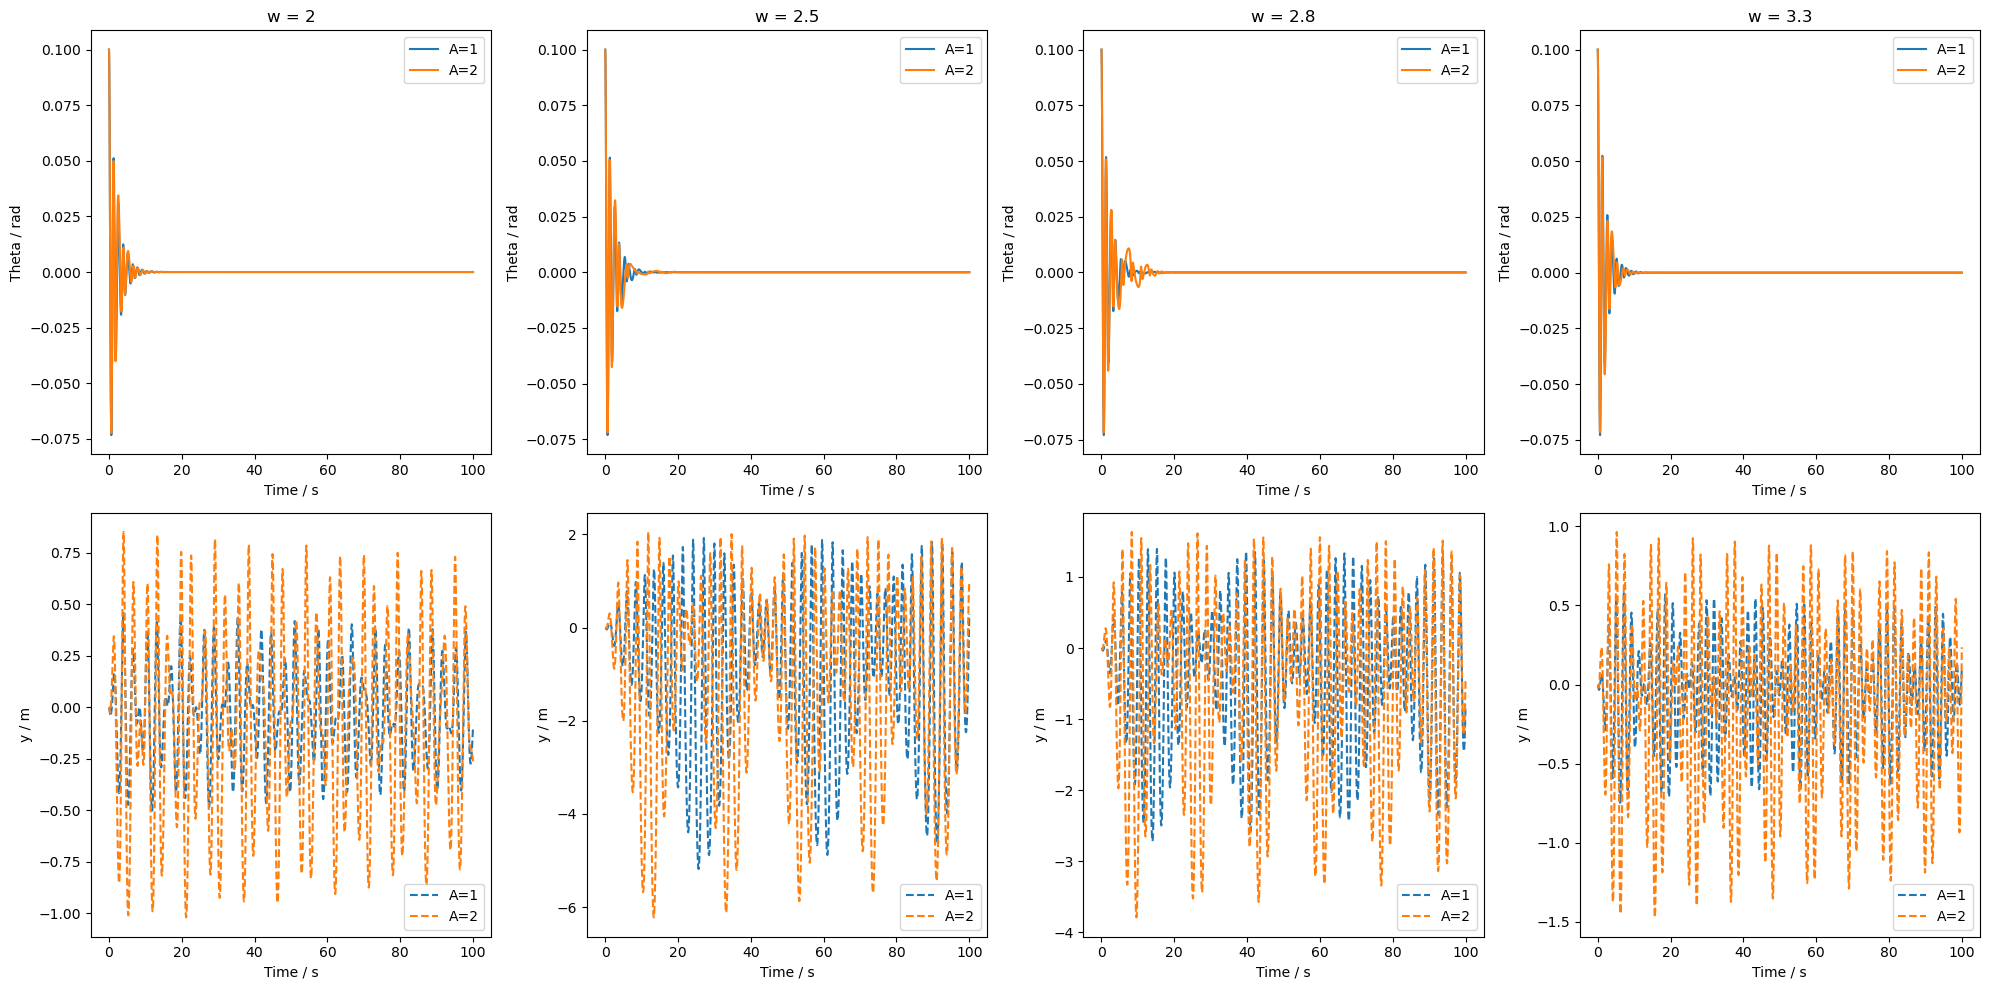

In [12]:
# Values of w to vary
w_values = [2,2.5,2.8,3.3]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Loop over the values of w
for i, w in enumerate(w_values):
    # Calculate theta and y for A=1 and current value of w
    times1, theta1, y1 = tacoma_withwind_damped(A=1, w=w, theta0 = 0.1, dt=0.001, p=1)

    # Calculate theta and y for A=2 and current value of w
    times2, theta2, y2 = tacoma_withwind_damped(A=2, w=w, theta0 = 0.1, dt=0.001, p=1)

    # Plot theta in the current subplot (top row)
    ax1 = axs[0, i];
    ax1.plot(times1, theta1, label='A=1');
    ax1.plot(times2, theta2, label='A=2');
    ax1.set_xlabel('Time / s');
    ax1.set_ylabel('Theta / rad');
    ax1.set_title(f'w = {w}');
    ax1.legend();

    # Plot y in the current subplot (bottom row)
    ax2 = axs[1, i];
    ax2.plot(times1, y1, label='A=1', linestyle='dashed');
    ax2.plot(times2, y2, label='A=2', linestyle='dashed');
    ax2.set_xlabel('Time / s');
    ax2.set_ylabel('y / m');
    ax2.legend();

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

As expected, using a dynamic damping system introduced stability into the angular rotation of the bridge. Where there was once problematic torsion angle resonance, we now have a quick decay of initial conditions to 0. We may choose the electromagnetic co-efficient as we like, higher p values do indeed make initial conditions decay much faster, but would ultimately depend on the energy supply avaliable to the inital magnetic field. 

Interestingly, the added damper has not made a change in the vertical displacement. To deal with this one could dampen vertical displacement by using quite standard shock absorbers - which would dissipate kinetic energy.

On the other hand, such success comes with shortcummings. This solution requires a comprehensive integration of strong magnetic fields with substantial energy supply, additional work to minimise vertical displacement, and extensive funding.

## References

[1] : D.B. Steinman, S.R. Watson, Bridges and their builders, Second Edition, Dover, New York (1957) [pp.46-47]

[2] : McKenna, P. J., and Cillian Ó Tuama. “Large Torsional Oscillations in Suspension Bridges Visited Again: Vertical Forcing Creates Torsional Response.” The American Mathematical Monthly 108, no. 8 (2001): 738–45. https://doi.org/10.2307/2695617.

[3] : Filippo Gazzola, Mohamed Jleli, Bessem Samet. A new detailed explanation of the Tacoma collapse and some optimization problems to improve the stability of suspension bridges[J]. Mathematics in Engineering, 2023, 5(2): 1-35. doi: 10.3934/mine.2023045

[4] : Faraday Michael 1852 III. Experimental researches in electricity.―Twenty-eighth seriesPhil. Trans. R. Soc.14225–56 https://doi.org/10.1098/rstl.1852.0004